WeatherPy Analysis

The northern hemisphere is much colder than the southern and humidity seems to increase as you approach the equator. 
Cloudiness and wind speed do not seem to have a strong relationship to latitude, however there is a stronger 
concentration of cities in the 25-50 latitude range with cloud cover at 0% and the 80% cloud cover.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import os
import csv
import seaborn as sns

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'api_keys'

In [2]:
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)



In [3]:
# Create data frame for city and weather data
columns = ('City', 'Country', 'Latitude', 'Longitude','Temp',
            'Humidity','Cloudiness','Wind Speed')
cities_df = pd.DataFrame(columns = columns)
cities_df

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed


In [8]:

sample_size = 500

target_url = 'http://api.openweathermap.org/data/2.5/weather?q='
units = 'imperial'

index = 0

# Grab weather records from OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Create random latitudes and logitudes
    random_lat = random.choice(lats)
    random_lng = random.choice(lngs)
    
    # Find nearest city
    city = citipy.nearest_city(random_lat, random_lng)
    city_name = city.city_name
    country_code = city.country_code
    
    #Call API
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    
    if weather_json["cod"] == 200:
        #print('City: '+ weather_json['name'])
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        
        # Get rid of duplicate cities and print log
        if city_name not in cities_df.City.values:
            print ("City:  " +  weather_json['name'] +"   " + str(len(cities_df)+1))

        
        # Append data to df
            cities_df.set_value(index, "City", city_name)
            cities_df.set_value(index, "Country", country_code)
            cities_df.set_value(index, "Latitude", latitude)
            cities_df.set_value(index, "Longitude", longitude)
            cities_df.set_value(index, "Temp", temp)
            cities_df.set_value(index, "Humidity", humidity)
            cities_df.set_value(index, "Cloudiness", cloud)
            cities_df.set_value(index, "Wind Speed", wind)

            index += 1
        
        else:
            pass
    else:
        pass
    

# Visualize df
cities_df.head()

City:  Jamestown   1
City:  Punta Arenas   2


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:41: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

City:  Bambous Virieux   3
City:  Tuktoyaktuk   4
City:  Avarua   5
City:  Bluff   6
City:  Hermanus   7
City:  Mar del Plata   8
City:  Cape Town   9
City:  Albany   10
City:  Rikitea   11
City:  Honiara   12
City:  Imbituba   13
City:  Sola   14
City:  Khatanga   15
City:  Aksu   16
City:  Pevek   17
City:  Ushuaia   18
City:  Folsom   19
City:  Kapaa   20
City:  Carnarvon   21
City:  Dikson   22
City:  Lavrentiya   23
City:  Tuatapere   24
City:  Kaitangata   25
City:  Severo-Kurilsk   26
City:  Yellowknife   27
City:  Belton   28
City:  Vila Velha   29
City:  Upernavik   30
City:  Saint-Philippe   31
City:  Nikolskoye   32
City:  Muyezerskiy   33
City:  Atambua   34
City:  Saint-Pierre   35
City:  Thompson   36
City:  Talnakh   37
City:  Cabo San Lucas   38
City:  Serro   39
City:  Lusaka   40
City:  Fort Nelson   41
City:  Kenai   42
City:  Caravelas   43
City:  Margate   44
City:  Bethel   45
City:  Xai-Xai   46
City:  Mugumu   47
City:  Kedougou   48
City:  Palora   49
City:  Bu

City:  Ulaanbaatar   374
City:  Mersing   375
City:  Dobryatino   376
City:  Hovd   377
City:  Concepcion del Uruguay   378
City:  Sorong   379
City:  Henties Bay   380
City:  Yar-Sale   381
City:  Sarh   382
City:  Victoria Point   383
City:  Cururupu   384
City:  Benguela   385
City:  Soeng Sang   386
City:  Great Falls   387
City:  Moron   388
City:  Sainte-Marie   389
City:  Georgetown   390
City:  Union   391
City:  Ponoka   392
City:  Kimberley   393
City:  Usinsk   394
City:  Morros   395
City:  Dymytrove   396
City:  Ashdod   397
City:  Kulhudhuffushi   398
City:  Grand Gaube   399
City:  Kokkola   400
City:  Newport   401
City:  Adrar   402
City:  Ponta Delgada   403
City:  Plyussa   404
City:  Santa Maria   405
City:  Mayya   406
City:  Linxia   407
City:  Kushiro   408
City:  Gravdal   409
City:  Nuuk   410
City:  Iglesias   411
City:  Kahta   412
City:  Puerto Escondido   413
City:  San Cristobal   414
City:  Tecoanapa   415
City:  Fairmont   416
City:  Tateyama   417
City:

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,jamestown,sh,-15.94,-5.72,78.06,98,56,18.14
1,punta arenas,cl,-53.16,-70.91,51.53,71,75,19.46
2,bambous virieux,mu,-20.34,57.76,80.47,83,40,6.93
3,tuktoyaktuk,ca,69.44,-133.03,15.8,92,90,5.82
4,avarua,ck,-21.21,-159.78,77,100,76,1.12


In [9]:
#Expot dataframe to a CSV file
output_path = os.path.join("Output", "Weather_Data.csv")
cities_df.to_csv(output_path, encoding="utf-8", index=False)
cities_df.head()

,City,Country,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed
0,jamestown,sh,-15.94,-5.72,78.06,98,56,18.14
1,punta arenas,cl,-53.16,-70.91,51.53,71,75,19.46
2,bambous virieux,mu,-20.34,57.76,80.47,83,40,6.93
3,tuktoyaktuk,ca,69.44,-133.03,15.8,92,90,5.82
4,avarua,ck,-21.21,-159.78,77,100,76,1.12


In [3]:
csv_path=os.path.join("Output", "Weather_Data.csv")

cities_df= pd.read_csv(csv_path)

#### Latitude vs. Temperature Plot

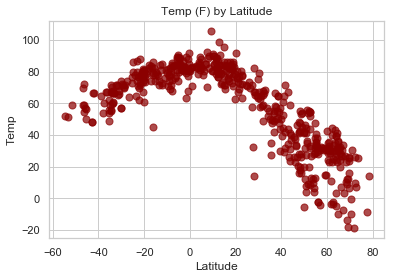

In [4]:
# Latitude vs. Temperature Scatterplot
sns.set(style="whitegrid")

fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp", data=cities_df, fit_reg=False, 
                    scatter_kws={"color":"darkred","alpha":0.7,"s":50}).set_title('Temp (F) by Latitude')

# Save the Figure
plt.savefig("Images/Lat_vs_Temp_Scatter.png")

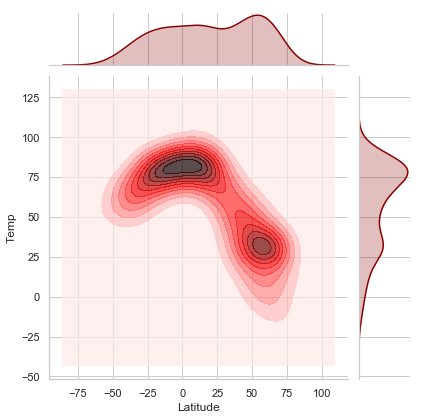

In [23]:
# Latitude vs. Temperature Marginal Distribution
sns.set(style="whitegrid", color_codes=True)
p=sns.jointplot(x="Latitude", y="Temp", data=cities_df, kind='kde', color="darkred", alpha=0.7)

# Save the Figure
plt.savefig("Images/Lat_vs_Temp_Marginal.png")

#### Latitude vs. Humidity Plot

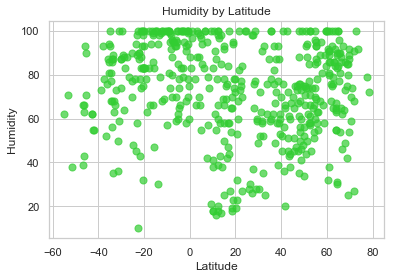

In [25]:
# Latitude vs. Humidity Scatterplot
sns.set(style="whitegrid")

fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity", data=cities_df, fit_reg=False, 
                    scatter_kws={"color":"limegreen","alpha":0.7,"s":50}).set_title('Humidity by Latitude')

# Save the Figure
plt.savefig("Images/Lat_vs_Humidity_Scatter.png")

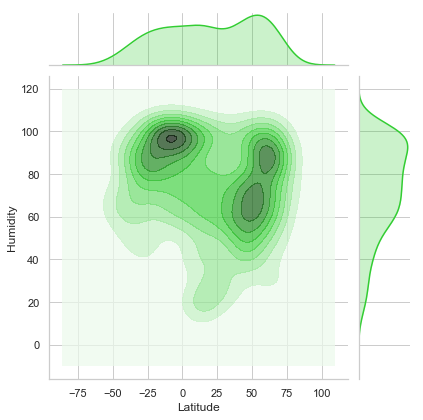

In [24]:
# Latitude vs. Humidity Marginal Distribution
sns.set(style="whitegrid", color_codes=True)
p=sns.jointplot(x="Latitude", y="Humidity", data=cities_df, kind='kde', color="limegreen", alpha=0.7)

# Save the Figure
plt.savefig("Images/Lat_vs_Humidity_Marginal.png")

#### Latitude vs. Cloudiness Plot

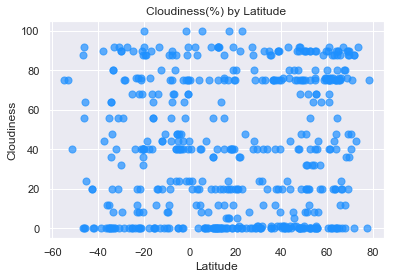

In [14]:
# Latitude vs. Cloudiness Scatterplot
sns.set(style="darkgrid")

fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness", data=cities_df, fit_reg=False, 
                    scatter_kws={"color":"dodgerblue","alpha":0.7,"s":50}).set_title('Cloudiness(%) by Latitude')

# Save the Figure
plt.savefig("Images/Lat_vs_Cloudiness_Scatter.png")

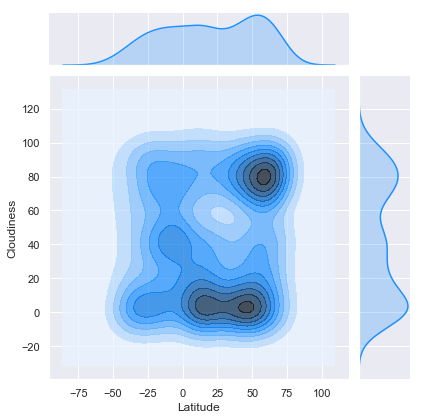

In [27]:
# Latitude vs. Cloudiness Marginal Distribution
sns.set(style="darkgrid", color_codes=True)
p=sns.jointplot(x="Latitude", y="Cloudiness", data=cities_df, kind='kde', color="dodgerblue", alpha=0.7)

# Save the Figure
plt.savefig("Images/Lat_vs_Cloudiness_Marginal.png")

#### Latitude vs. Wind Speed Plot

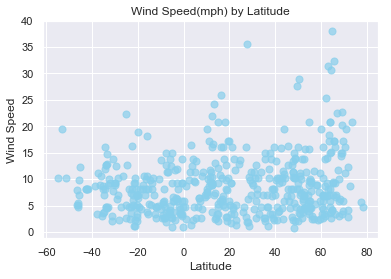

In [15]:
# Latitude vs. Wind Scatterplot
sns.set(style="darkgrid")

fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed", data=cities_df, fit_reg=False, 
                    scatter_kws={"color":"skyblue","alpha":0.7,"s":50}).set_title('Wind Speed(mph) by Latitude')

# Save the Figure
plt.savefig("Images/Lat_vs_Wind_Scatter.png")

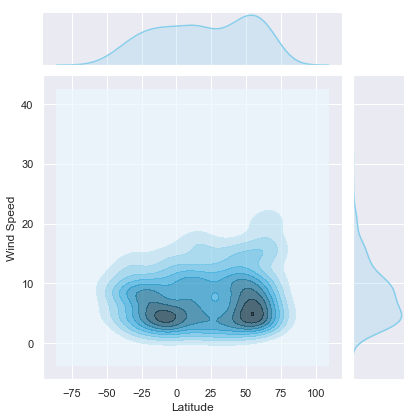

In [29]:
# Latitude vs. Wind Marginal Distribution
sns.set(style="darkgrid", color_codes=True)
p=sns.jointplot(x="Latitude", y="Wind Speed", data=cities_df, 
                kind='kde', color="skyblue", alpha=.7)

# Save the Figure
plt.savefig("Images/Lat_vs_Wind_Marginal.png")